House sales in King  count

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as sm
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pickle
%matplotlib inline

Data Munging

In [3]:
data = pd.read_csv('Housedata.csv')

In [4]:
data.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.tail()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,21608,263000018,20140521T000000,360000.0,3.0,2.50,1530,1131,3.0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,21609,6600060120,20150223T000000,400000.0,4.0,2.50,2310,5813,2.0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,21610,1523300141,20140623T000000,402101.0,2.0,0.75,1020,1350,2.0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,21611,291310100,20150116T000000,400000.0,3.0,2.50,1600,2388,2.0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,21612,1523300157,20141015T000000,325000.0,2.0,0.75,1020,1076,2.0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [6]:
data.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [36]:
data.isnull().sum()

Unnamed: 0       0
id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
data.describe()

,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
nan_counts = data[['bedrooms', 'bathrooms']].isna().sum()
print(nan_counts)
for column in ['bedrooms', 'bathrooms']:
    print(f"Number of NaN values for the column {column}: {data[column].isna().sum()}")


bedrooms     13
bathrooms    10
dtype: int64
Number of NaN values for the column bedrooms: 13
Number of NaN values for the column bathrooms: 10


In [9]:
mean = data['bedrooms'].mean()
data['bedrooms'] = data['bedrooms'].fillna(mean)
data['bedrooms'] = data['bedrooms'].transform(lambda x: x.fillna(x.mean()))

In [10]:
mean = data['bathrooms'].mean()
data['bathrooms'] = data['bathrooms'].fillna(mean)
data['bathrooms'] = data['bathrooms'].transform(lambda x: x.fillna(x.mean()))

In [11]:
nan_counts = data[['bedrooms', 'bathrooms']].isna().sum()
print(nan_counts)
for column in ['bedrooms', 'bathrooms']:
    print(f"Number of NaN values for the column {column}: {data[column].isna().sum()}")

bedrooms     0
bathrooms    0
dtype: int64
Number of NaN values for the column bedrooms: 0
Number of NaN values for the column bathrooms: 0


EDA

In [12]:
floor_counts = data.groupby('floors').size().reset_index(name='count')
print(floor_counts)

   floors  count
0     1.0  10680
1     1.5   1910
2     2.0   8241
3     2.5    161
4     3.0    613
5     3.5      8


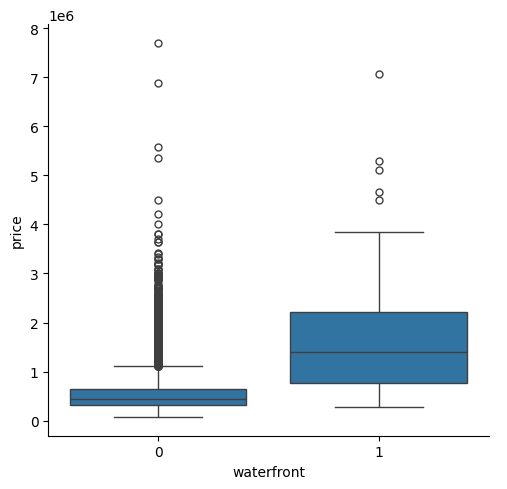

In [13]:
sns.catplot(x='waterfront', y='price', kind='box', data=data)

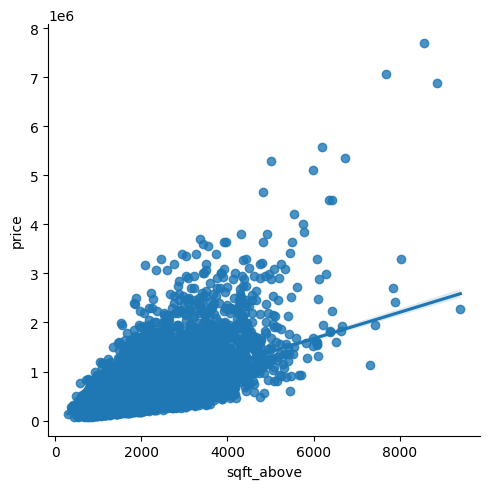

In [17]:
sns.lmplot(x="sqft_above",y="price",data=data)

In [57]:
data = data
data = pd.DataFrame(data)

# Convert the 'floats' column to integers with rounding
data['date'] = pd.to_datetime(data['date'], format='%Y%m%dT%H%M%S')

# Step 2: Extract year, month, and day as integers
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day

In [61]:
Correlation = data.corr()['price'].sort_values()
print(Correlation)

zipcode         -0.053203
id              -0.016762
day             -0.014670
month           -0.010081
date            -0.004357
year             0.003576
long             0.021626
Unnamed: 0       0.027372
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64


In [66]:
print(Correlation.shape)

(25,)


In [67]:
Correlation = pd.DataFrame(Correlation)
if Correlation.shape[0] != Correlation.shape[1]:
    print("The correlation matrix is not square.")

The correlation matrix is not square.


<Axes: >

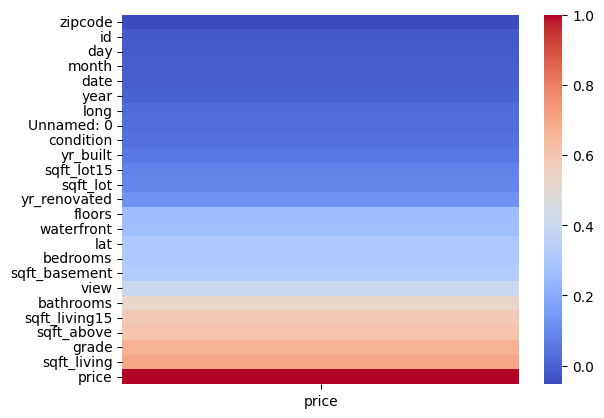

In [71]:
mask = np.zeros_like(Correlation, dtype=bool)
sns.heatmap(Correlation, mask=mask, cmap='coolwarm')

Model Refinement

In [76]:
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", 
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", 
            "sqft_living"]

X = data[features]
Y = data['price']

model = LinearRegression()

#Split the Data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


Fit the Model Using scikit-learn

In [77]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model
model.fit(x_train, y_train)

LinearRegression()

In [78]:
# Print coefficients
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [-2.93728392e+04  5.68386709e+05  6.77973130e+05 -2.57793250e+04
  6.71315186e+13  6.93472433e+04 -1.87832674e+03 -2.24474183e+00
  6.71315186e+13  8.08827090e+04 -6.71315186e+13]
Intercept: -32616229.434693456


Evaluate the Model

In [40]:
y_pred = model.predict(x_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r_squared}')

Mean Squared Error: 51707938594.66937
R-squared: 0.6478803620645457


Feature Importance

In [47]:
rdfr_model = RandomForestRegressor()
rdfr_model.fit(x_train, y_train)

# Get feature importances   
importances = rdfr_model.feature_importances_
feature_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

          Feature  Importance
9           grade    0.319605
10    sqft_living    0.285693
2             lat    0.201360
7   sqft_living15    0.044833
1      waterfront    0.036138
5            view    0.028894
8      sqft_above    0.028127
6       bathrooms    0.021936
4   sqft_basement    0.015540
0          floors    0.008951
3        bedrooms    0.008923


In [79]:
output_data = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
output_data.reset_index(drop=True, inplace=True)


In [83]:
output_data.to_csv('predicted_house_prices.csv', index=False)
output_data.to_pickle('predicted_house_prices.pkl')